In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import litmus

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


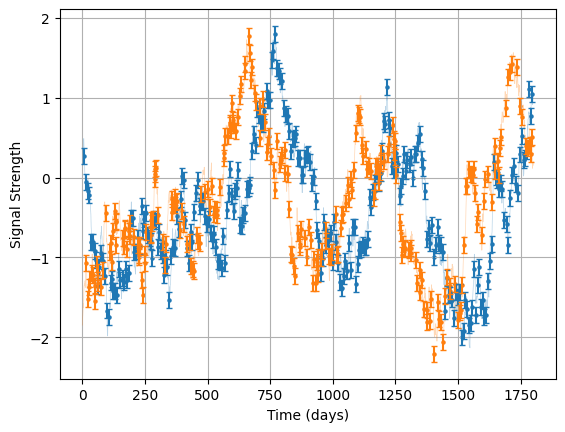

In [2]:
mymock = litmus.mocks.mock_C.copy(tau=np.exp(5.56), lag=106, cadence=(7, 7), E=[0.1, 0.1], season=0.0)

mymock = mymock(3)

mymock.plot()
plt.show()

In [3]:
model = litmus.models.GP_simple()
model.debug = False
lc_1, lc_2 = mymock.lc_1, mymock.lc_2
seed_params = model.find_seed(model.lc_to_data(lc_1, lc_2))[0]
print("\t Param \t Est \t True")
for key in seed_params.keys():
    print("\t %s: \t%.2f \t %.2f" % (key, seed_params[key], mymock.params()[key]))

	 Param 	 Est 	 True
	 lag: 	105.63 	 106.00
	 logtau: 	7.21 	 5.56
	 logamp: 	-0.26 	 0.00
	 rel_amp: 	1.03 	 1.00
	 mean: 	-0.45 	 0.00
	 rel_mean: 	0.09 	 0.00


In [4]:

fitting_method = litmus.fitting_methods.SVI_scan(model,
                                                 Nlags=24,
                                                 init_samples=5_000,
                                                 grid_bunching=0.8,
                                                 optimizer_args={'tol': 1E-1,
                                                                 'maxiter': 1024,
                                                                 'increase_factor': 1.1,
                                                                 },
                                                 reverse=False,
                                                 ELBO_Nsteps=300,
                                                 ELBO_Nsteps_init=200,
                                                 ELBO_particles=24,
                                                 ELBO_optimstep=0.014,
                                                 seed_params=seed_params,
                                                 )

litmus_handler = litmus.LITMUS(fitting_method)
litmus_handler.add_lightcurve(lc_1)
litmus_handler.add_lightcurve(lc_2)

In [5]:
litmus_handler.fit()

Starting SVI Scan 
Beginning scan at constrained-space position: 
	 lag: 	 105.63 
	 logtau: 	 7.21 
	 logamp: 	 -0.26 
	 rel_amp: 	 1.03 
	 mean: 	 -0.45 
	 rel_mean: 	 0.09 
Log-Density for this is: -267.14 
Moving to new location... 
INFO: jaxopt.BacktrackingLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 7455.4638671875 Stepsize:1.0  Objective Value:7424.94140625  Decrease Error:7455.4638671875 
INFO: jaxopt.BacktrackingLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 6709.62353515625 Stepsize:0.800000011920929  Objective Value:6736.8759765625  Decrease Error:6709.62353515625 
INFO: jaxopt.BacktrackingLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 6112.951171875 Stepsize:0.64000004529953  Objective Value:6186.423828125  Decrease Error:6112.951171875 
INFO: jaxopt.BacktrackingLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 5635.61328125 Stepsize:0.5120000243186951  Objective Value:5746.062011

Warning! Optimization seems to have diverged. Defaulting to seed params. 
Please consider running with different optim_init inputs 


Aquired hessian is...
[[   477.22375488  -1096.99084473   -356.50064087   -114.79384613
     143.43525696]
 [ -1096.9921875    1557.46325684    531.40991211    249.95448303
    -210.33482361]
 [  -356.50076294    531.41094971   4934.04931641 -22571.68945312
    -625.86889648]
 [  -114.79221344    249.9467926  -22571.69140625   9177.66601562
   -8796.07226562]
 [   143.43528748   -210.33343506   -625.86962891  -8796.12792969
   10408.02539062]]
Performing SVI slice at the MAP estimate 





100%|██████████| 200/200 [00:01<00:00, 126.80it/s, init loss: nan, avg. loss [191-200]: nan]



:::::::::::::::::::::::
Scanning at lag=0.00 ... 
From inf to nan, change of nan against 100.00 
Unable to converge at itteration 0 / 24 

:::::::::::::::::::::::
Scanning at lag=100.45 ... 
From inf to nan, change of nan against 100.00 
Unable to converge at itteration 1 / 24 

:::::::::::::::::::::::
Scanning at lag=100.76 ... 
From inf to nan, change of nan against 100.00 
Unable to converge at itteration 2 / 24 

:::::::::::::::::::::::
Scanning at lag=101.06 ... 
From inf to nan, change of nan against 100.00 
Unable to converge at itteration 3 / 24 

:::::::::::::::::::::::
Scanning at lag=101.37 ... 
From inf to nan, change of nan against 100.00 
Unable to converge at itteration 4 / 24 

:::::::::::::::::::::::
Scanning at lag=101.67 ... 
From inf to nan, change of nan against 100.00 
Unable to converge at itteration 5 / 24 

:::::::::::::::::::::::
Scanning at lag=101.98 ... 
From inf to nan, change of nan against 100.00 
Unable to converge at itteration 6 / 24 

::::::::::::::

KeyboardInterrupt: 